In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

📌 Dataset shape: (1000, 14)

📌 First 5 rows:
   Age  Gender Education_Level  Years_Experience                Skills  \
0   27  Female      Bachelor’s                11     ”HR / Management"   
1   43    Male      Bachelor’s                16  "JavaScript / React"   
2   35  Female      Bachelor's                12        "Python / SQL"   
3   32    Male        Master's                20     "HR / Management"   
4   44  Female         Diploma                18   "Data Science / ML"   

       Applied_Position Application_Status  Interview_Score Hiring_Decision  \
0  Marketing Specialist           Accepted             83.0           Hired   
1            HR Manager           Rejected             79.0       Not Hired   
2     Software Engineer            Pending             56.0       Not Hired   
3            HR Manager           Rejected             84.0       Not Hired   
4            HR Manager           Rejected             96.0       Not Hired   

   Salary_Expectation  Past_Applica

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_5934/36123312.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel", order=df[col].value_counts().index)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_5934/36123312.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel", order=df[col].value_counts().index)
/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_5934/36123312.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel", orde

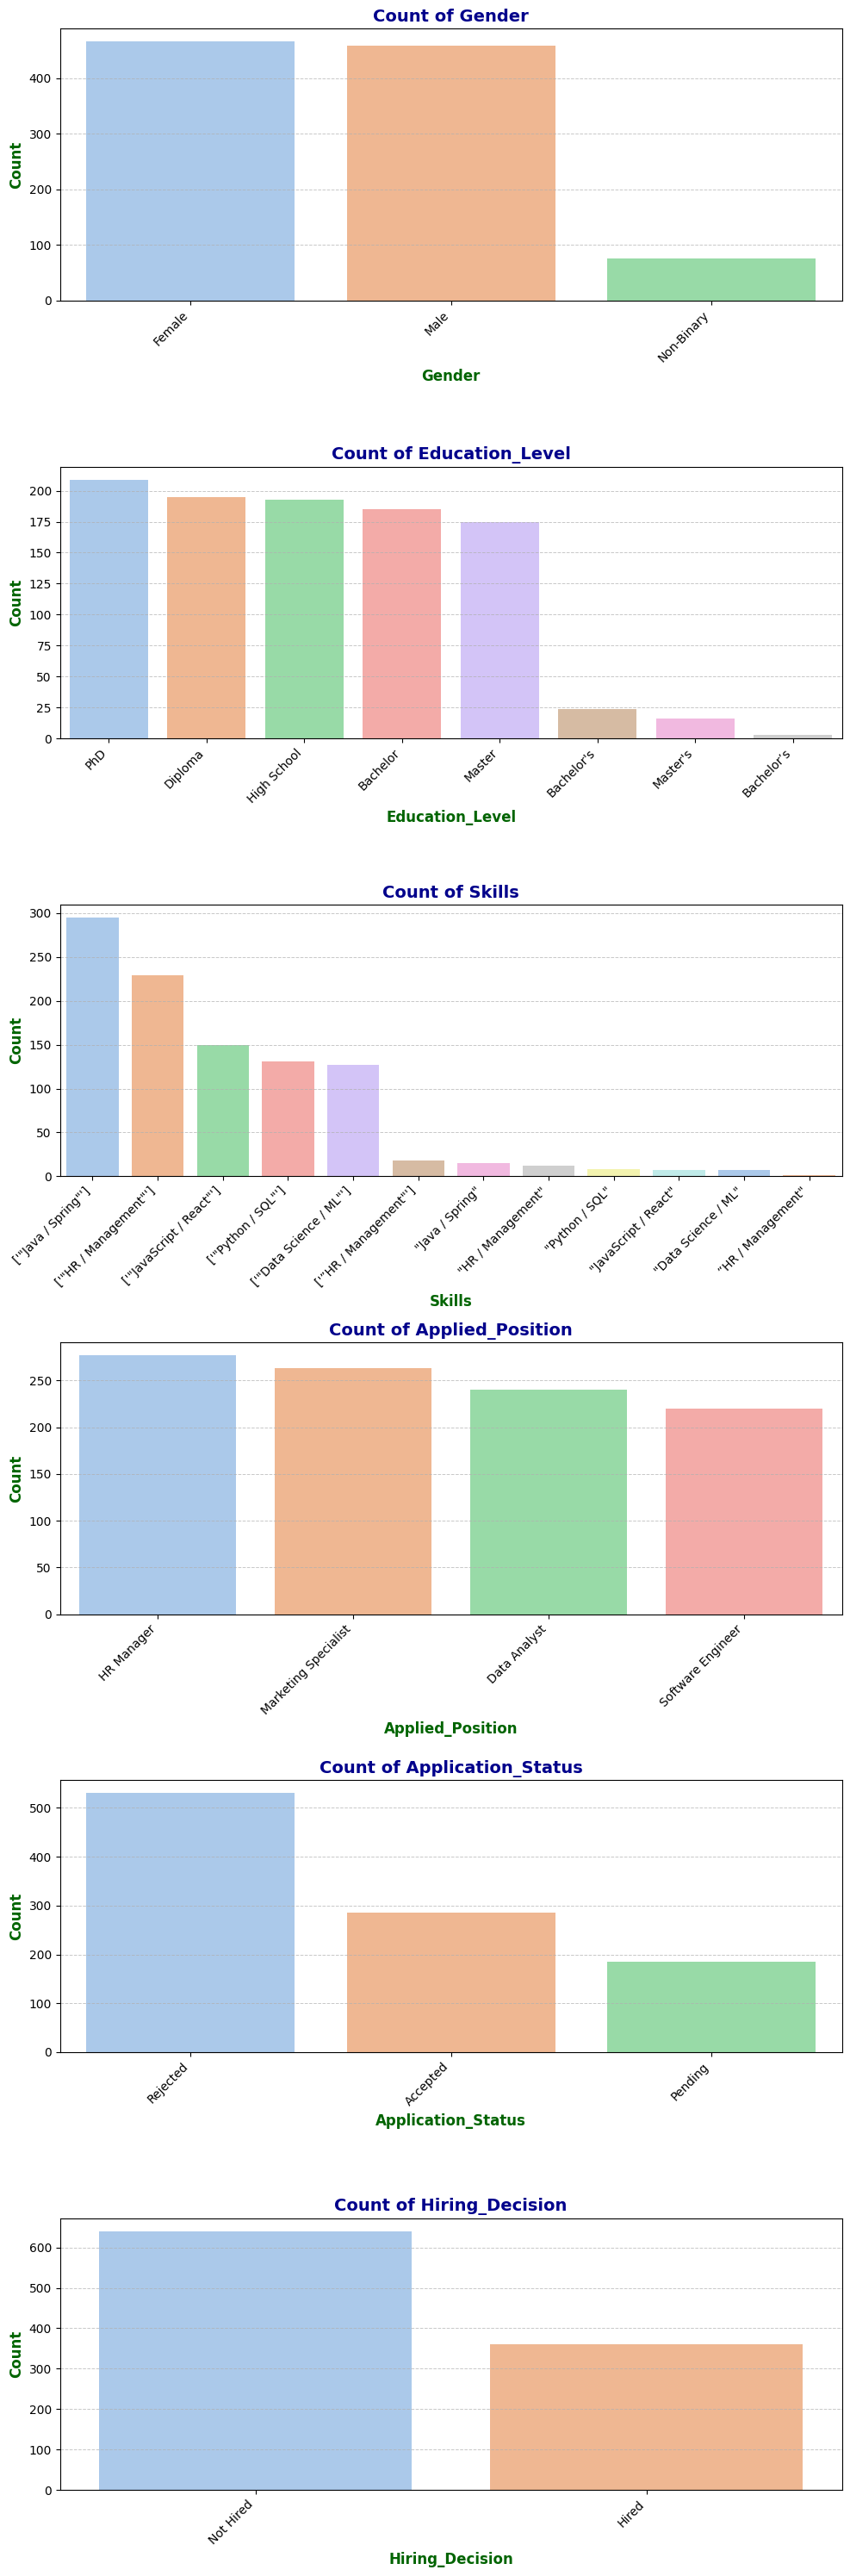

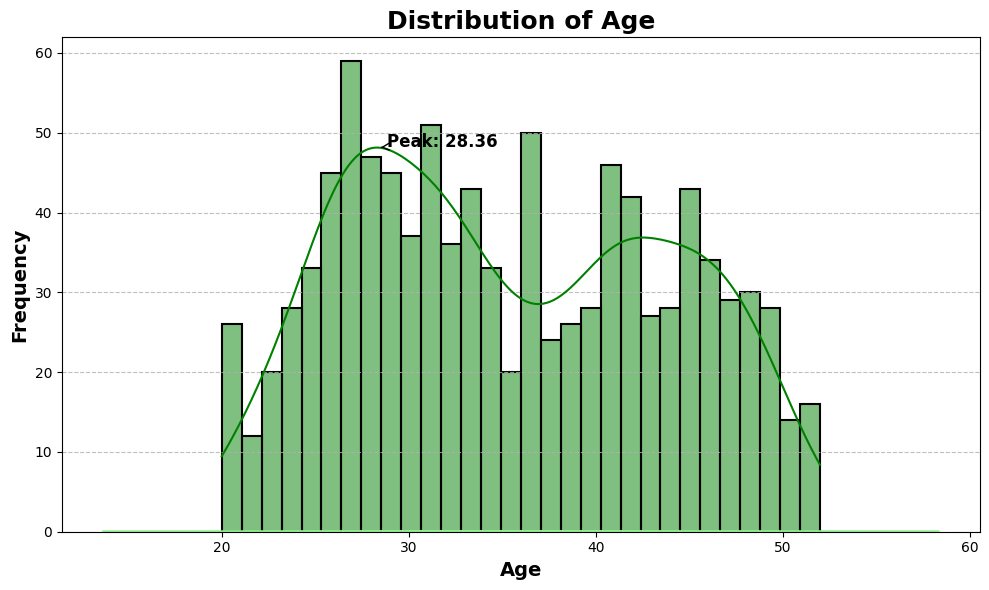

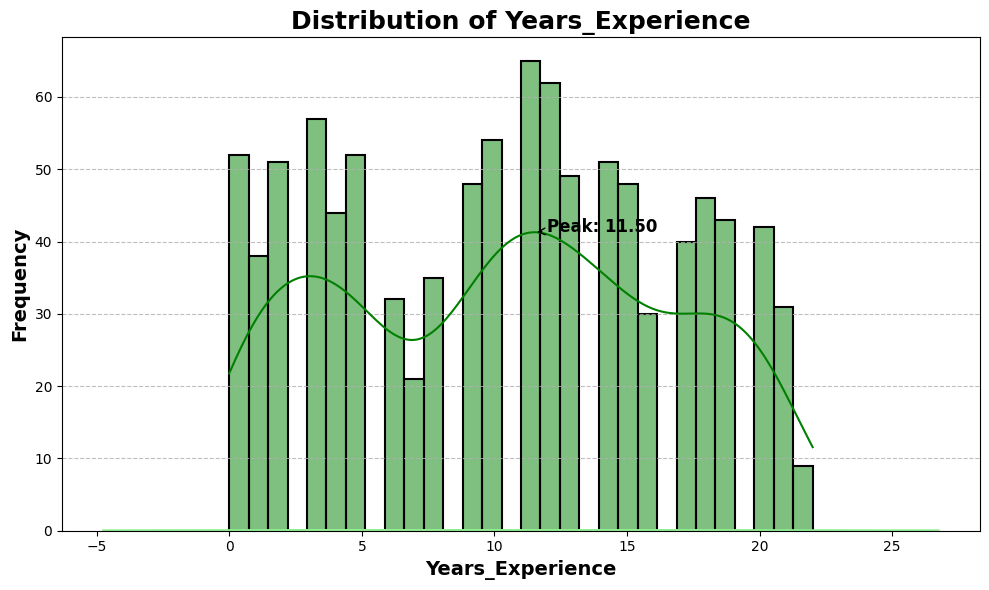

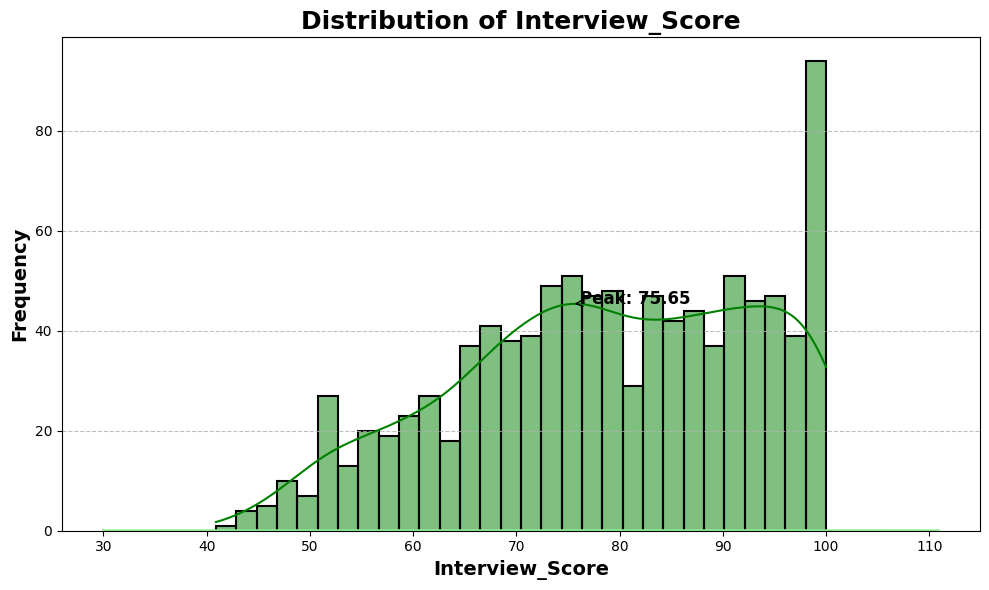

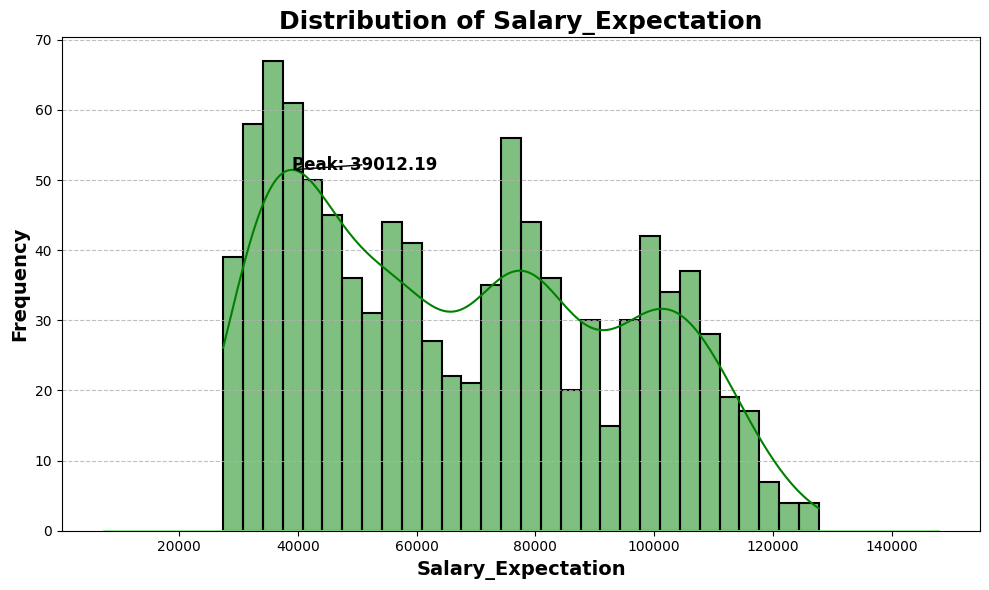

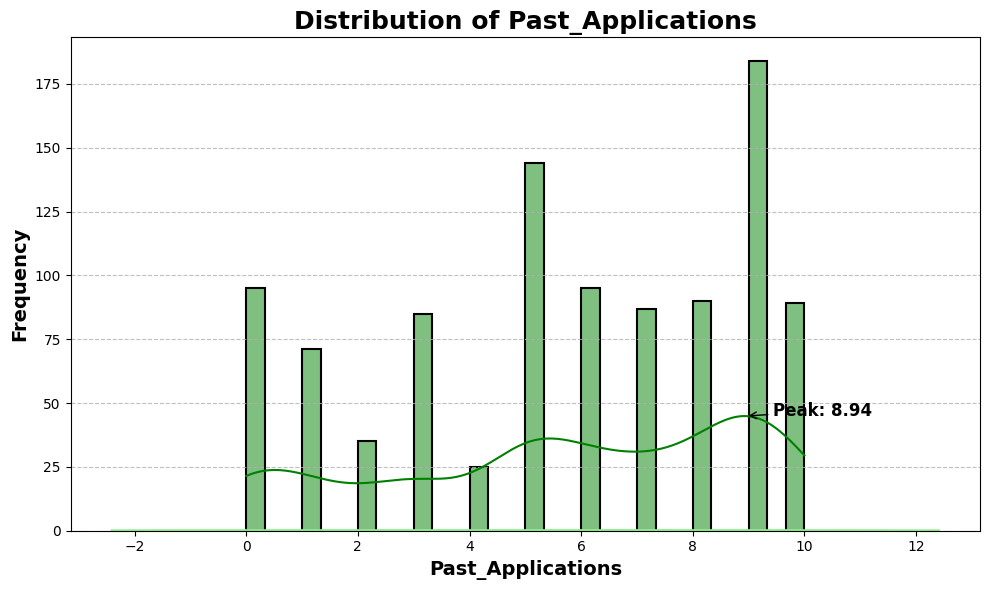

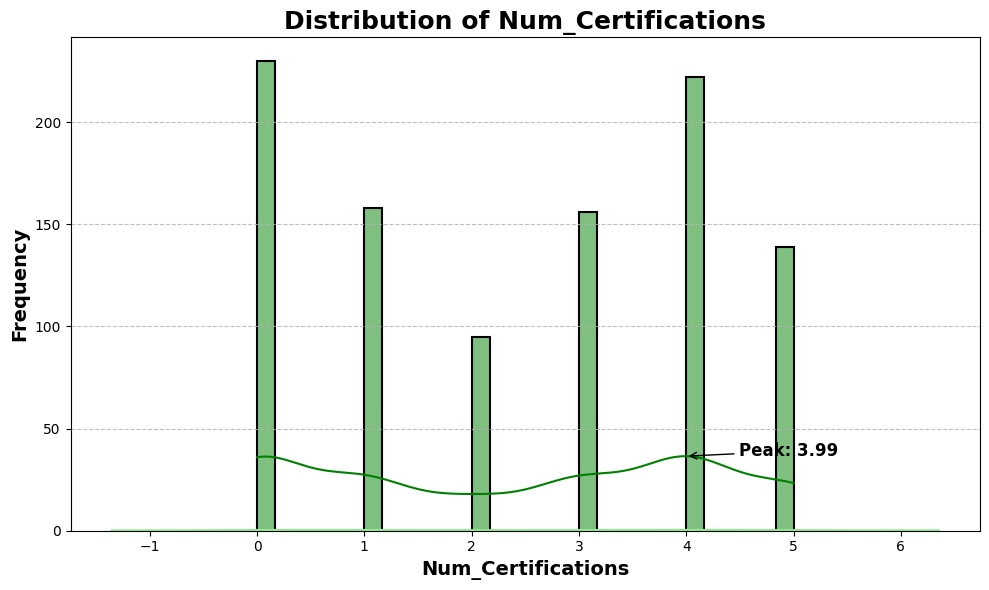

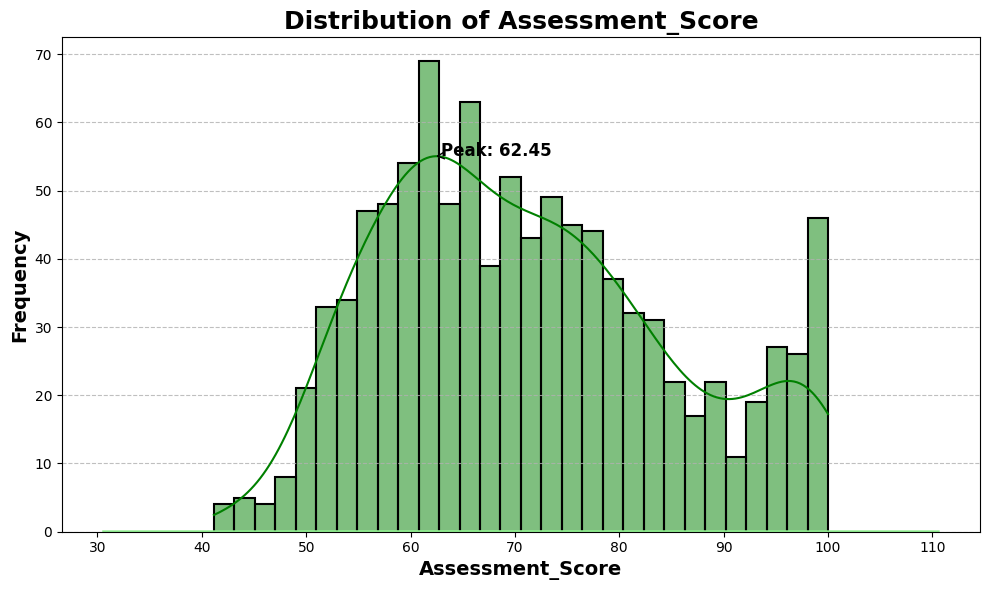

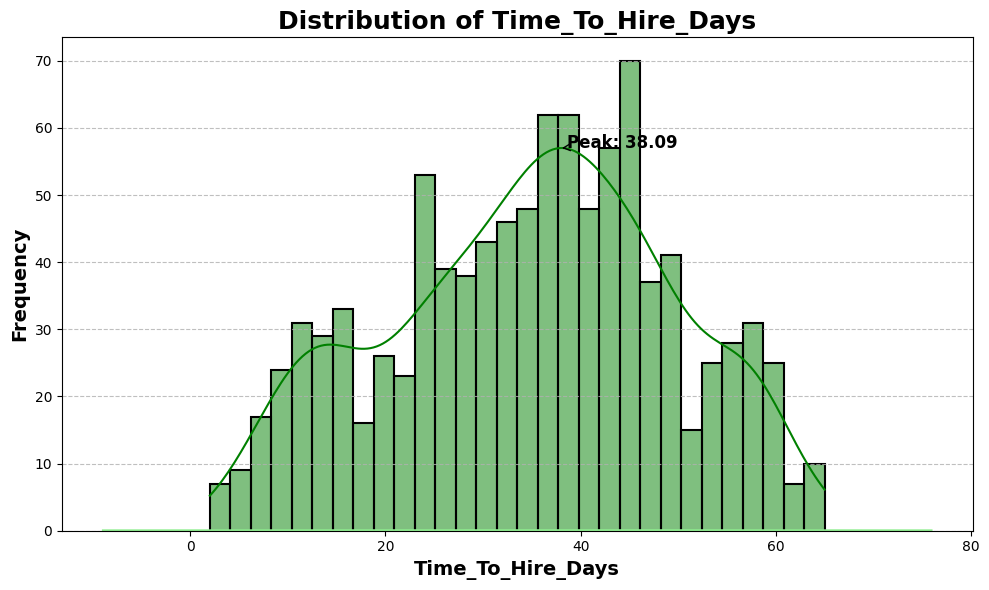

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('augmented_dataset_1000_rows.csv')
# Drop Name and Candidate_ID columns
df.drop(['Name', 'Candidate_ID'], axis=1, inplace=True)

# =============================
# 1. Quick Overview
# =============================
print("📌 Dataset shape:", df.shape)
print("\n📌 First 5 rows:")
print(df.head())

print("\n📌 Data types and non-null counts:")
print(df.info())

print("\n📌 Missing values per column:")
print(df.isnull().sum())

# =============================
# 2. Value Counts for Categorical Features
# =============================
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

plt.figure(figsize=(10, 5 * len(categorical_cols)))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(x=df[col], palette="pastel", order=df[col].value_counts().index)
    plt.title(f'Count of {col}', fontsize=14, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=12, fontweight='bold', color='darkgreen')
    plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkgreen')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

# =============================
# 3. Histograms for Numerical Features
# =============================
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color="green", edgecolor="black", linewidth=1.5, bins=30)
    plt.title(f'Distribution of {col}', fontsize=18, fontweight='bold', color='black')
    plt.xlabel(col, fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')
    plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.8)

    # KDE peak annotation
    if df[col].notnull().any():
        kde_ax = sns.kdeplot(df[col], color="lightgreen", linewidth=2)
        y_data = kde_ax.lines[0].get_data()[1]
        x_data = kde_ax.lines[0].get_data()[0]
        max_density = y_data.max()
        max_x = x_data[y_data.argmax()]
        plt.annotate(f"Peak: {max_x:.2f}", xy=(max_x, max_density),
                     xytext=(max_x + 0.5, max_density + 0.02),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=12, color="black", fontweight="bold")
    plt.tight_layout()
    plt.show()


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_5934/1015706279.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/zahra/Desktop/HiringPrediction/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


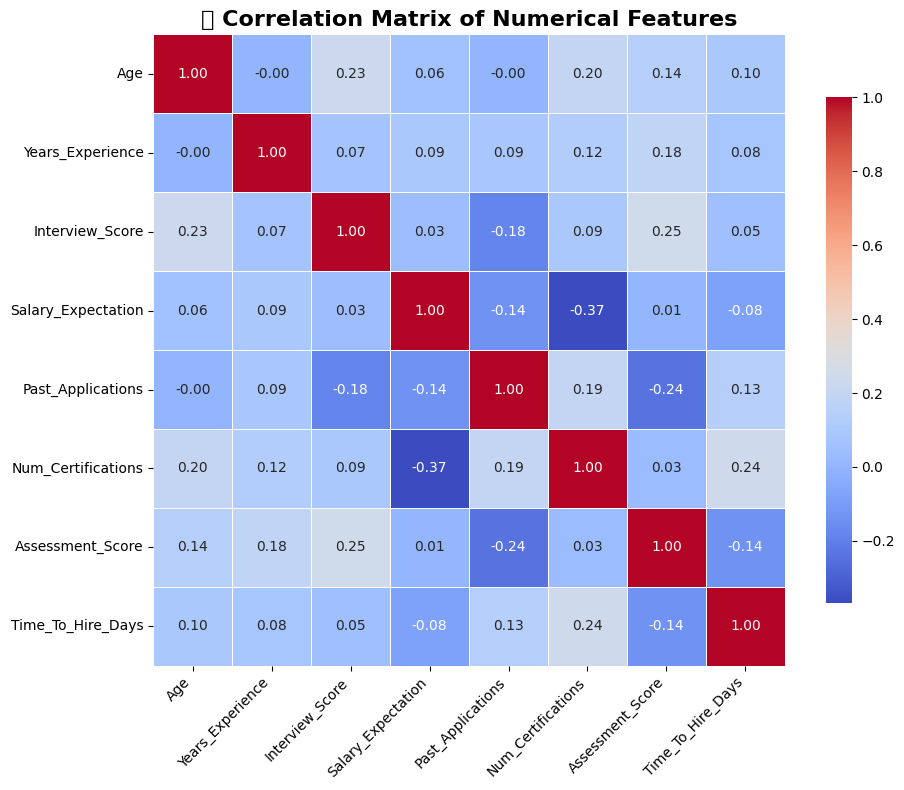

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("📊 Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


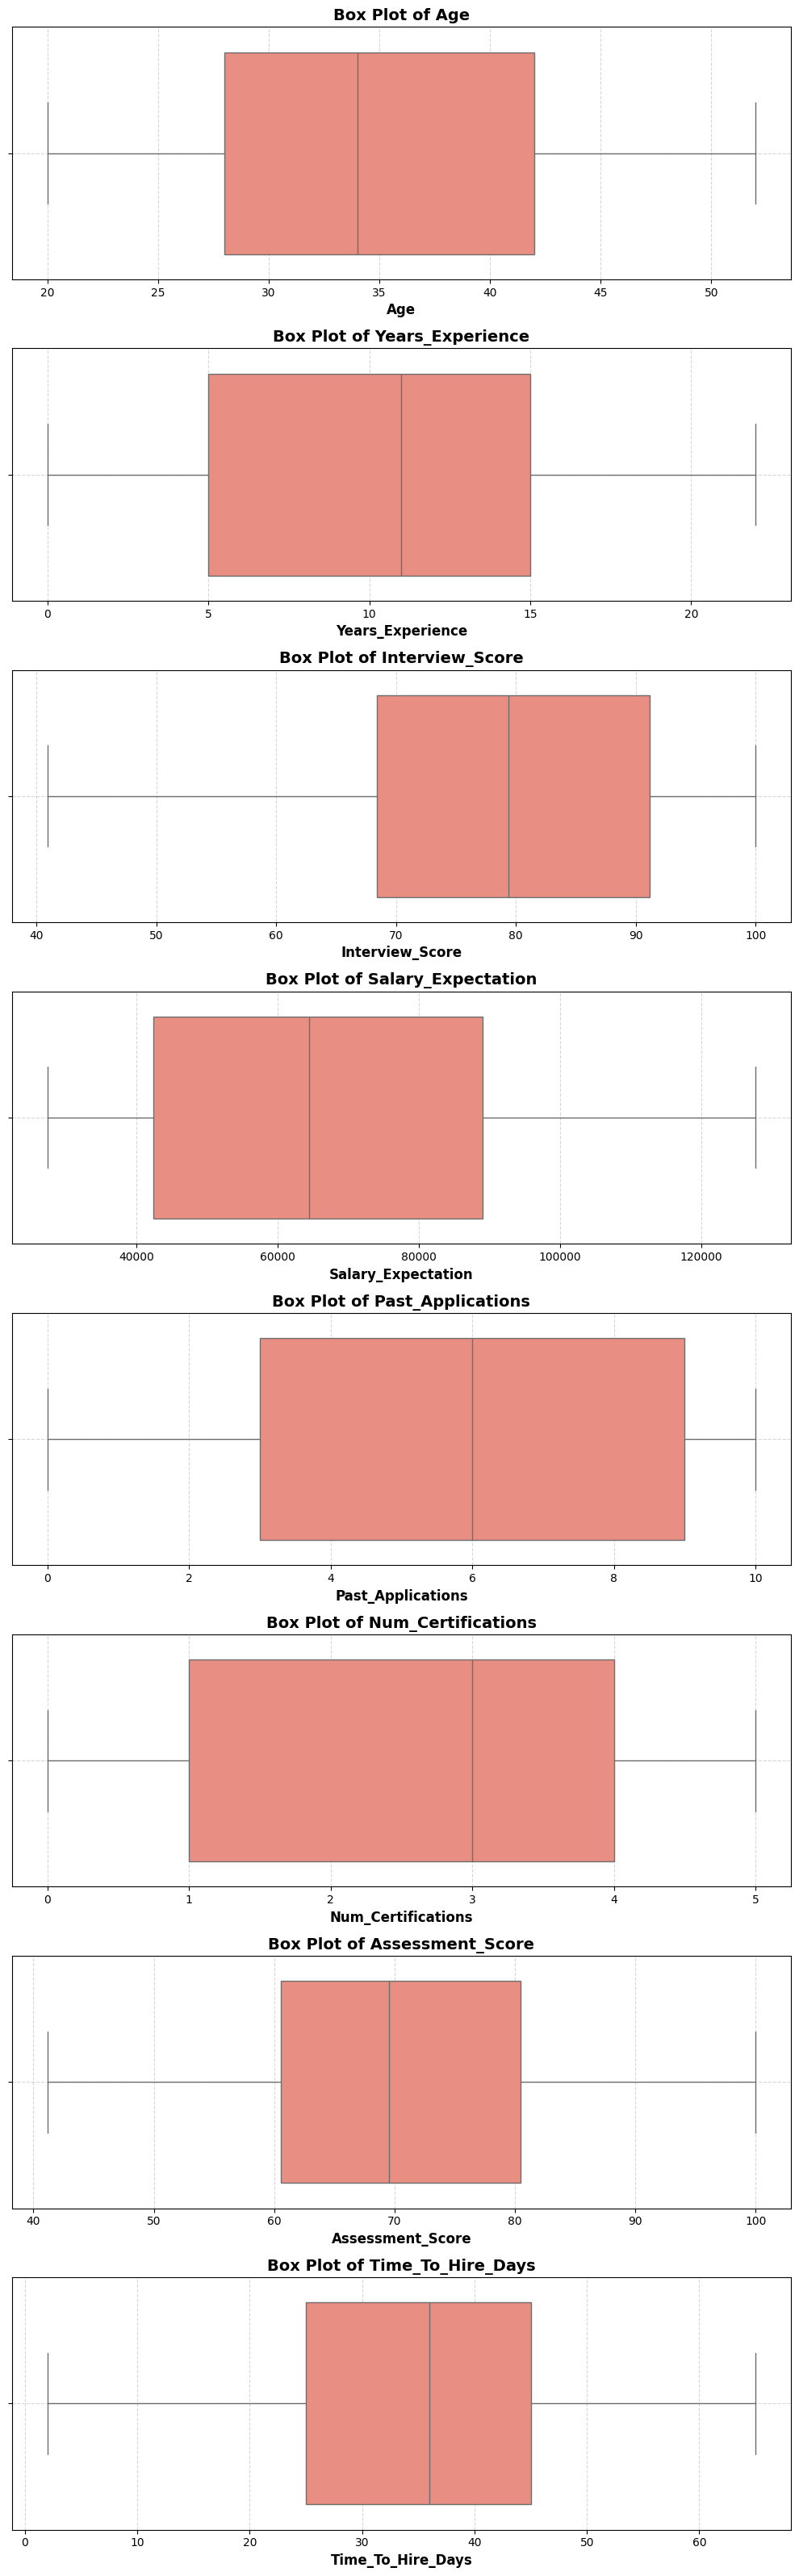

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot boxplots for each numerical column
plt.figure(figsize=(10, len(numerical_cols) * 4))  # Adjust height dynamically
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(data=df, x=col, color='salmon')
    plt.title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


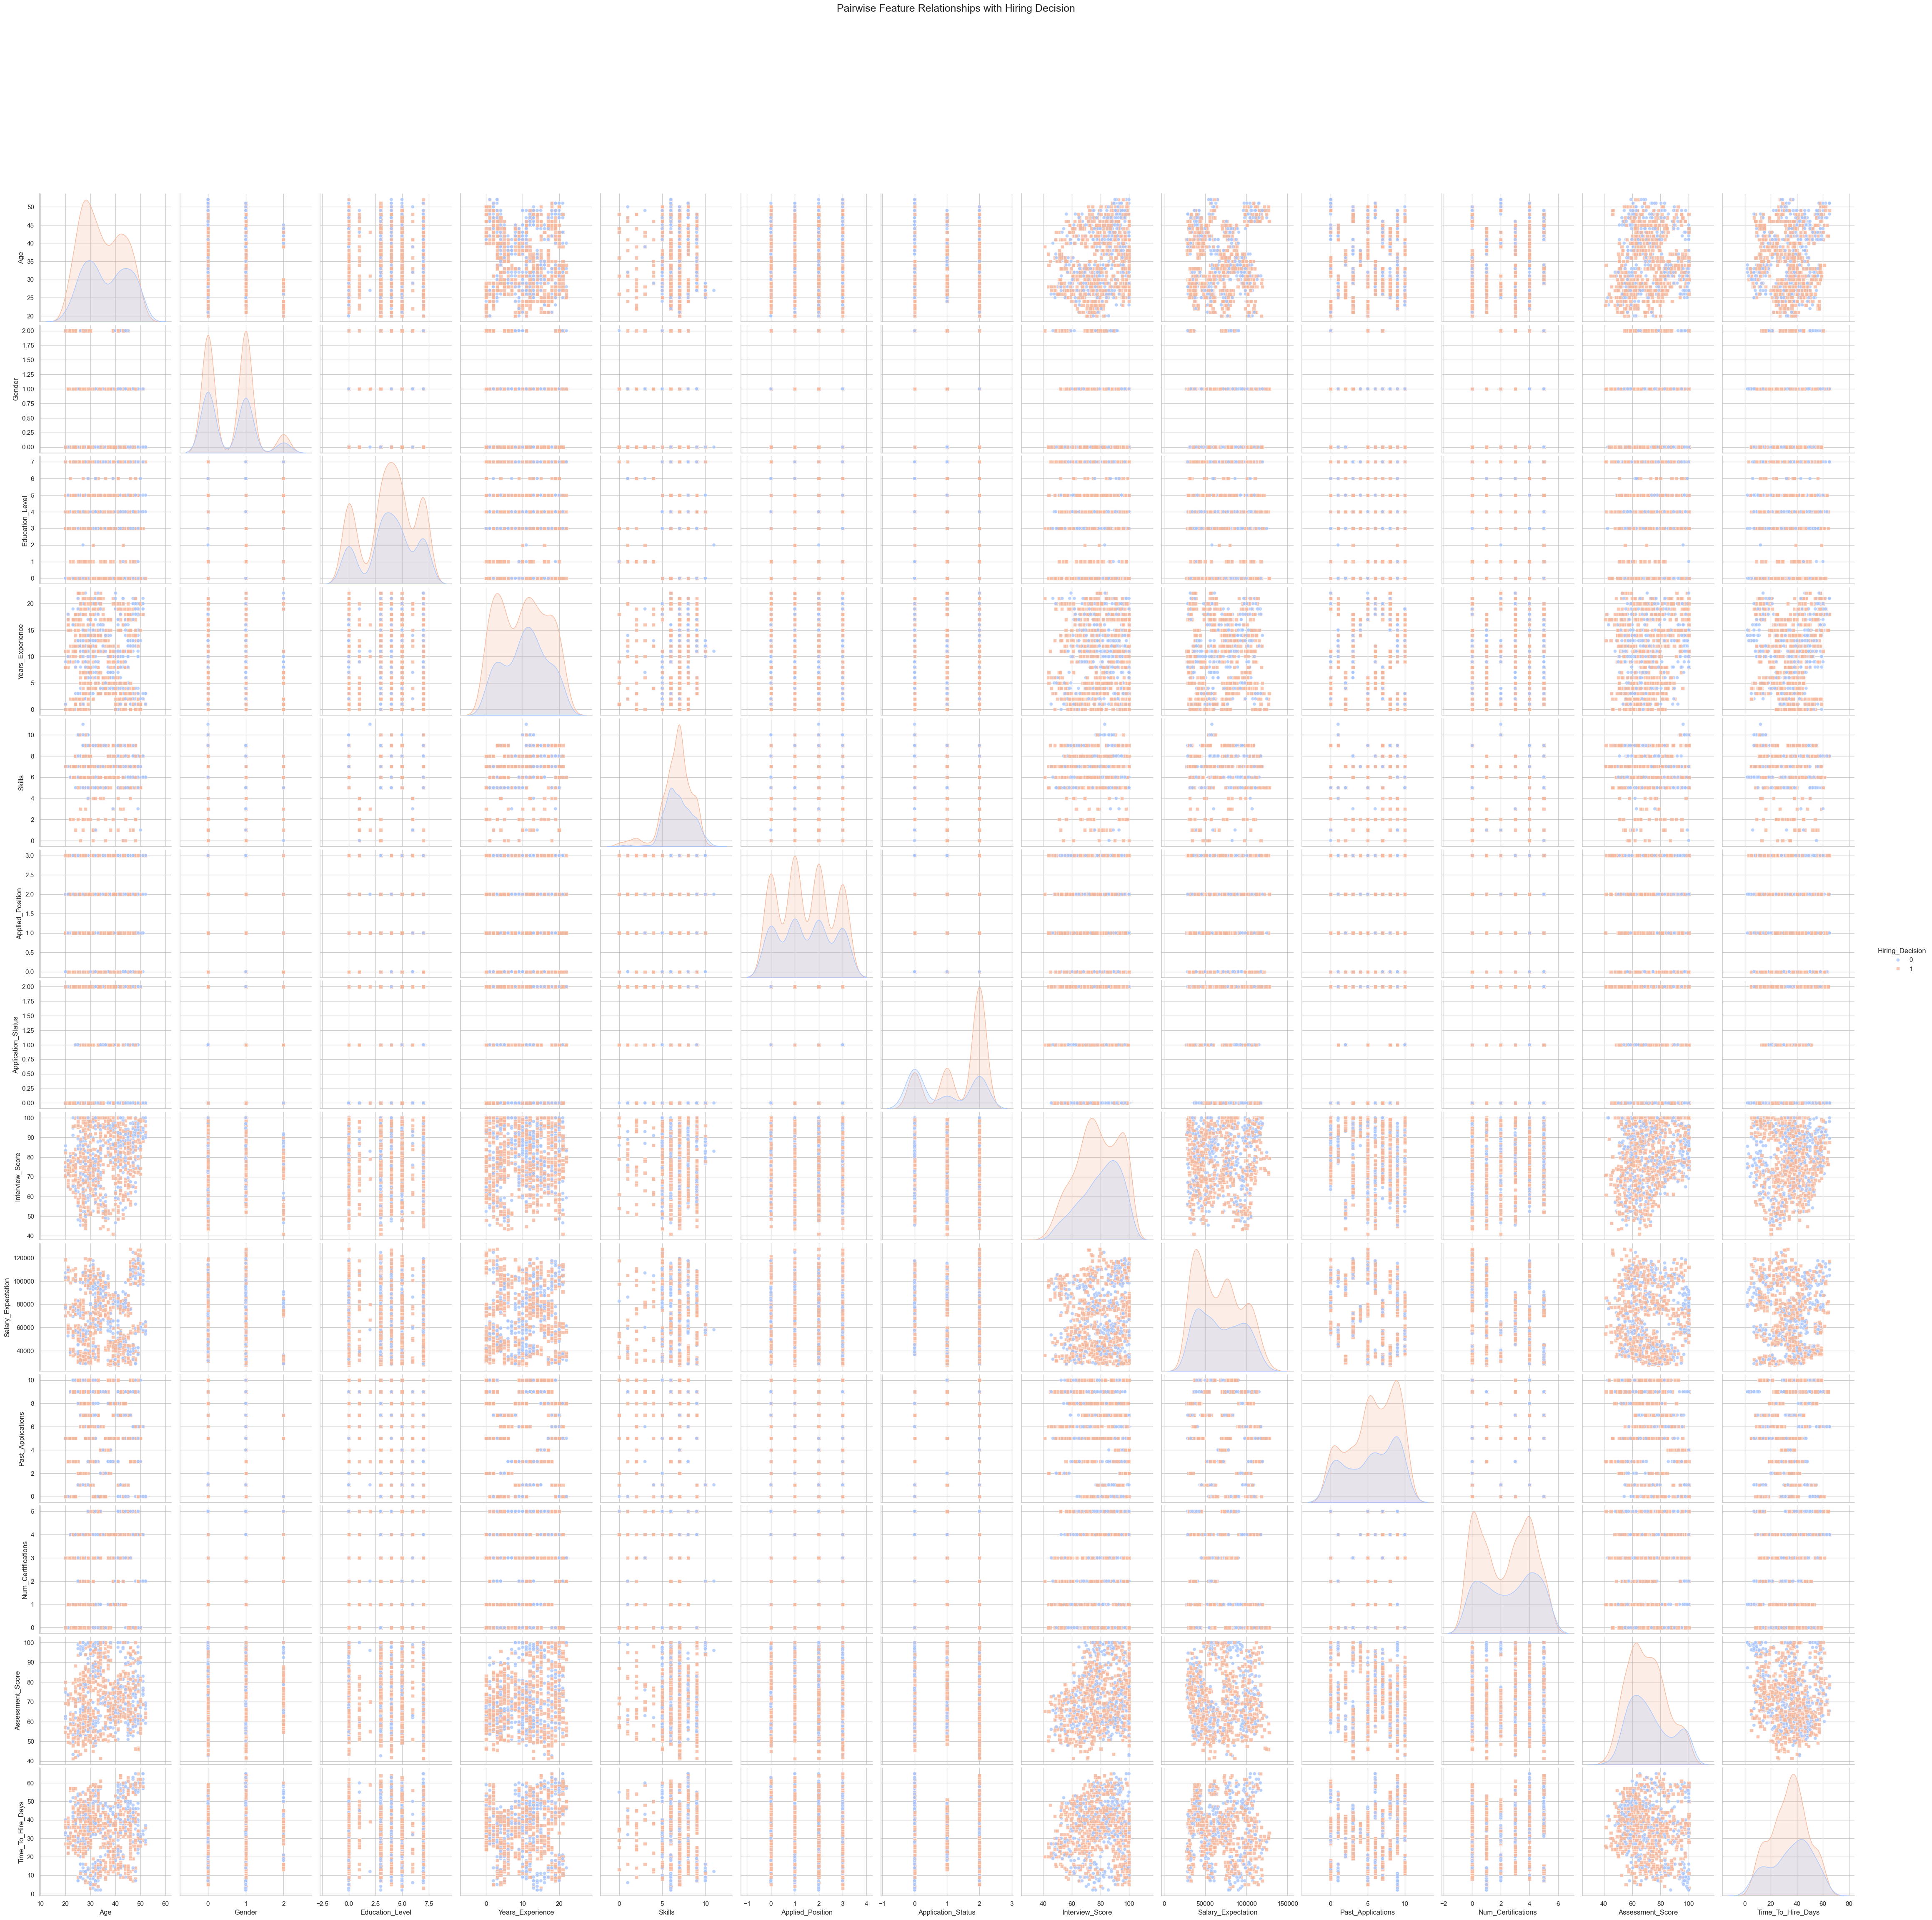

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Copy data and encode categorical columns
data_transformed = df.copy()
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data_transformed[col] = label_encoders[col].fit_transform(data_transformed[col])

# Step 2: Set seaborn style
sns.set(style='whitegrid')

# Step 3: Pairplot with Hiring_Decision as hue
pairplot = sns.pairplot(
    data_transformed,
    hue='Hiring_Decision',  # Target column
    height=3.5,
    diag_kind="kde",
    palette="coolwarm",
    markers=["o", "s"],
    plot_kws={'alpha': 0.8}
)

# Step 4: Add title and adjust layout
pairplot.fig.suptitle('Pairwise Feature Relationships with Hiring Decision', y=1.02, fontsize=18)
plt.subplots_adjust(top=0.92)
plt.show()


## data preparation


In [16]:
# Print a formatted message for missing values
missing_values = df.isnull().sum()

# Display the missing values with a more descriptive message
print("\n🔴 Missing Values Overview:")
print(f"{'Column Name':<30} {'Missing Values'}")
print("="*50)

# Print the missing values count for each column
for col, missing in missing_values.items():
    print(f"{col:<30} {missing:>15}")



🔴 Missing Values Overview:
Column Name                    Missing Values
Age                                          0
Gender                                       0
Education_Level                              0
Years_Experience                             0
Skills                                       0
Applied_Position                             0
Application_Status                           0
Interview_Score                              0
Hiring_Decision                              0
Salary_Expectation                           0
Past_Applications                            0
Num_Certifications                           0
Assessment_Score                             0
Time_To_Hire_Days                            0


In [17]:
def drop_duplicates_and_summary(df):
    # Before dropping duplicates, print the number of duplicates
    duplicate_count = df.duplicated().sum()
    
    # Drop duplicates
    df_cleaned = df.drop_duplicates()
    
    # Print summary
    print("\n🟢 Duplicate Removal Overview:")
    print(f"{'Column Name':<30} {'Duplicates Removed'}")
    print("="*50)
    print(f"{'Total Duplicates Removed':<30} {duplicate_count:>15}")
    
    # Return the cleaned DataFrame
    return df_cleaned

# Example usage
df_cleaned = drop_duplicates_and_summary(df)



🟢 Duplicate Removal Overview:
Column Name                    Duplicates Removed
Total Duplicates Removed                     0


In [19]:
from sklearn.preprocessing import LabelEncoder

def label_encode_categorical(df):
    # Create a copy of the DataFrame to avoid modifying the original one
    df_encoded = df.copy()

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Apply Label Encoding to each categorical column
    for col in categorical_cols:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

    # Print the transformed DataFrame's column types
    print("\n🟢 Label Encoding Completed:")
    print(df_encoded.dtypes)
    
    # Return the encoded DataFrame
    return df_encoded

# Example usage
df_encoded = label_encode_categorical(df)
df_encoded.head()



🟢 Label Encoding Completed:
Age                     int64
Gender                  int64
Education_Level         int64
Years_Experience        int64
Skills                  int64
Applied_Position        int64
Application_Status      int64
Interview_Score       float64
Hiring_Decision         int64
Salary_Expectation    float64
Past_Applications       int64
Num_Certifications      int64
Assessment_Score      float64
Time_To_Hire_Days       int64
dtype: object


Age  Gender  Education_Level  Years_Experience  Skills  Applied_Position  \
0   27       0                2                11      11                 2   
1   43       1                2                16       3                 1   
2   35       0                1                12       4                 3   
3   32       1                6                20       1                 1   
4   44       0                3                18       0                 1   

   Application_Status  Interview_Score  Hiring_Decision  Salary_Expectation  \
0                   0             83.0                0             58092.0   
1                   2             79.0                1             79941.0   
2                   1             56.0                1             92874.0   
3                   2             84.0                1             61215.0   
4                   2             96.0                1             52387.0   

   Past_Applications  Num_Certifications  Assessment_Score  Time_To_Hire_Days  
0                  1                   2              96.0                 12  
1                  9                   5              70.0                 59  
2                  9                   0              69.0                 44  
3                  0                   3              95.0                 56  
4                  7                   4              69.0                 13

In [20]:
from sklearn.preprocessing import MinMaxScaler

def normalize_features(df):
    # Create a copy of the DataFrame to avoid modifying the original one
    df_normalized = df.copy()

    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Apply MinMaxScaler to numerical columns
    df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])

    # Print the transformed DataFrame's head for inspection
    print("\n🟢 Normalization Completed:")
    print(df_normalized.head())
    
    # Return the normalized DataFrame
    return df_normalized

# Example usage
df_normalized = normalize_features(df_encoded)
df_normalized.head()


🟢 Normalization Completed:
       Age  Gender  Education_Level  Years_Experience    Skills  \
0  0.21875     0.0         0.285714          0.500000  1.000000   
1  0.71875     0.5         0.285714          0.727273  0.272727   
2  0.46875     0.0         0.142857          0.545455  0.363636   
3  0.37500     0.5         0.857143          0.909091  0.090909   
4  0.75000     0.0         0.428571          0.818182  0.000000   

   Applied_Position  Application_Status  Interview_Score  Hiring_Decision  \
0          0.666667                 0.0         0.712361              0.0   
1          0.333333                 1.0         0.644681              1.0   
2          1.000000                 0.5         0.255522              1.0   
3          0.333333                 1.0         0.729281              1.0   
4          0.333333                 1.0         0.932320              1.0   

   Salary_Expectation  Past_Applications  Num_Certifications  \
0            0.305844                0.1  

Age  Gender  Education_Level  Years_Experience    Skills  \
0  0.21875     0.0         0.285714          0.500000  1.000000   
1  0.71875     0.5         0.285714          0.727273  0.272727   
2  0.46875     0.0         0.142857          0.545455  0.363636   
3  0.37500     0.5         0.857143          0.909091  0.090909   
4  0.75000     0.0         0.428571          0.818182  0.000000   

   Applied_Position  Application_Status  Interview_Score  Hiring_Decision  \
0          0.666667                 0.0         0.712361              0.0   
1          0.333333                 1.0         0.644681              1.0   
2          1.000000                 0.5         0.255522              1.0   
3          0.333333                 1.0         0.729281              1.0   
4          0.333333                 1.0         0.932320              1.0   

   Salary_Expectation  Past_Applications  Num_Certifications  \
0            0.305844                0.1                 0.4   
1            0.523725                0.9                 1.0   
2            0.652694                0.9                 0.0   
3            0.336987                0.0                 0.6   
4            0.248953                0.7                 0.8   

   Assessment_Score  Time_To_Hire_Days  
0          0.932022           0.158730  
1          0.490166           0.904762  
2          0.473172           0.666667  
3          0.915028           0.857143  
4          0.473172           0.174603

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

# Step 1: Define your target column (in this case 'Hiring_Decision')
target_column = 'Hiring_Decision'

# Step 2: Separate features (X) and target (y)
X = df_normalized.drop(columns=[target_column])
y = df_normalized[target_column]

# Step 3: Apply SelectKBest with Chi-squared method to select top 6 features
selector = SelectKBest(score_func=chi2, k=6)
X_new = selector.fit_transform(X, y)

# Step 4: Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Step 5: Create a new DataFrame with the selected features
df_selected = pd.DataFrame(X_new, columns=selected_features)

# Step 6: Add the target column 'Hiring_Decision' back to the DataFrame
df_selected[target_column] = y.values

# Step 7: Display the first few rows of the selected features
print("\n🟢 Selected Features for Hiring Decision:")
print(df_selected.head())



🟢 Selected Features for Hiring Decision:
       Age  Years_Experience  Application_Status  Past_Applications  \
0  0.21875          0.500000                 0.0                0.1   
1  0.71875          0.727273                 1.0                0.9   
2  0.46875          0.545455                 0.5                0.9   
3  0.37500          0.909091                 1.0                0.0   
4  0.75000          0.818182                 1.0                0.7   

   Num_Certifications  Assessment_Score  Hiring_Decision  
0                 0.4          0.932022              0.0  
1                 1.0          0.490166              1.0  
2                 0.0          0.473172              1.0  
3                 0.6          0.915028              1.0  
4                 0.8          0.473172              1.0  


In [22]:
from sklearn.model_selection import train_test_split

# Step 1: Define your features (X) and target (y)
X = df_selected.drop(columns=['Hiring_Decision'])  # Features (all except target)
y = df_selected['Hiring_Decision']  # Target (Hiring_Decision)

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Display the shapes of the train and test sets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (800, 6)
Testing Features Shape: (200, 6)
Training Target Shape: (800,)
Testing Target Shape: (200,)


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_5934/3493280254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="coolwarm")


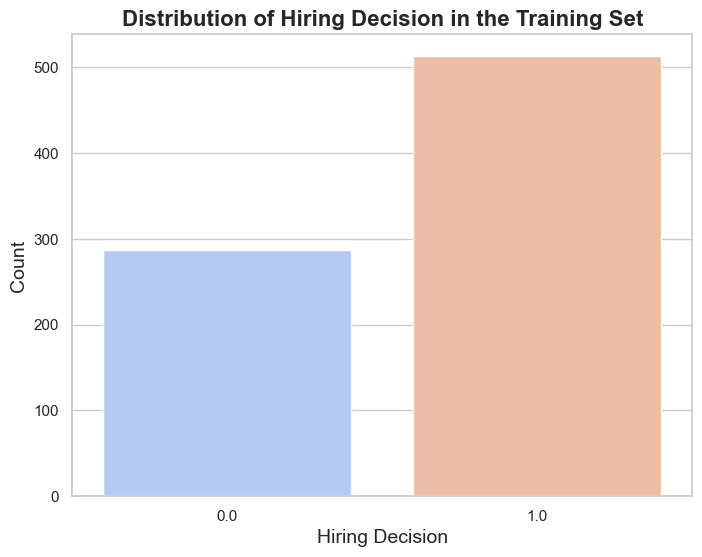

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a count plot to visualize the distribution of the target variable in the training set
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette="coolwarm")

# Step 2: Add title and labels
plt.title('Distribution of Hiring Decision in the Training Set', fontsize=16, fontweight='bold')
plt.xlabel('Hiring Decision', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Step 3: Display the plot
plt.show()


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_5934/1586875738.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette="coolwarm")


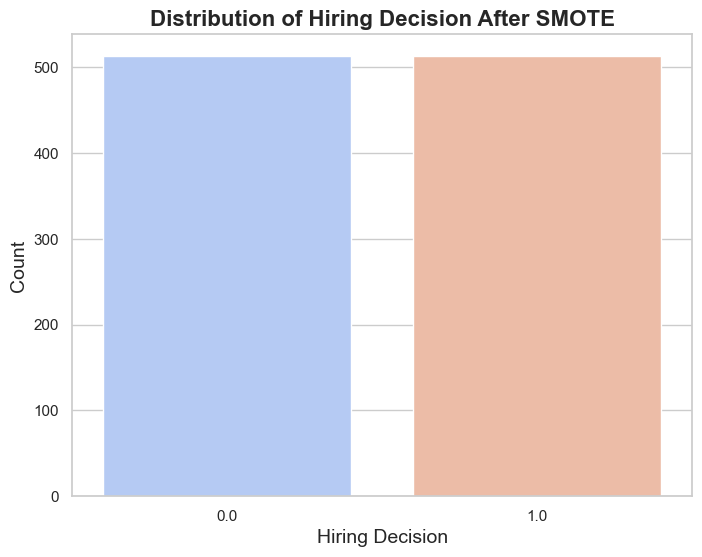

In [25]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Visualize the target distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, palette="coolwarm")

# Step 3: Add title and labels
plt.title('Distribution of Hiring Decision After SMOTE', fontsize=16, fontweight='bold')
plt.xlabel('Hiring Decision', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Step 4: Display the plot
plt.show()


## modeling 

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_selected contains the selected features and target column
# Separate features (X) and target (y)
X = df_selected.drop(columns=['Hiring_Decision'])  # Features (all except target)
y = df_selected['Hiring_Decision']  # Target (Hiring_Decision)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize RandomForestClassifier with tuned hyperparameters
rf = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=10,           # Max depth of the tree
    min_samples_leaf=5,     # Min samples per leaf
    max_features='sqrt',    # Randomly select subset of features for each split
    class_weight='balanced', # Adjust class weights for imbalance
    random_state=42
)

# Fit the model
rf.fit(X_train_resampled, y_train_resampled)

# Predictions
train_preds = rf.predict(X_train_resampled)
test_preds = rf.predict(X_test)

# Calculate Metrics
accuracy_train = accuracy_score(y_train_resampled, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)

precision_train = precision_score(y_train_resampled, train_preds)
precision_test = precision_score(y_test, test_preds)

recall_train = recall_score(y_train_resampled, train_preds)
recall_test = recall_score(y_test, test_preds)

f1_train = f1_score(y_train_resampled, train_preds)
f1_test = f1_score(y_test, test_preds)

roc_auc_train = roc_auc_score(y_train_resampled, rf.predict_proba(X_train_resampled)[:, 1])
roc_auc_test = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Print metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Train Value': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train],
    'Test Value': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]
})

print(metrics)

# Classification Report
print("\nClassification Report (Train Data):")
print(classification_report(y_train_resampled, train_preds))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))


      Metric  Train Value  Test Value
0   Accuracy     0.814815    0.655000
1  Precision     0.774194    0.698630
2     Recall     0.888889    0.803150
3   F1-Score     0.827586    0.747253
4    ROC-AUC     0.911620    0.578524

Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80       513
         1.0       0.77      0.89      0.83       513

    accuracy                           0.81      1026
   macro avg       0.82      0.81      0.81      1026
weighted avg       0.82      0.81      0.81      1026


Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.54      0.40      0.46        73
         1.0       0.70      0.80      0.75       127

    accuracy                           0.66       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.64      0.66      0.64       200



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_selected contains the selected features and target column
# Separate features (X) and target (y)
X = df_selected.drop(columns=['Hiring_Decision'])  # Features (all except target)
y = df_selected['Hiring_Decision']  # Target (Hiring_Decision)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],  # Optimization algorithm
    'penalty': ['l2', 'elasticnet'],  # Regularization penalty
    'max_iter': [100, 200, 500]  # Max iterations for convergence
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the Logistic Regression model with the best parameters
logreg_best = grid_search.best_estimator_

# Predict on train and test sets
y_train_pred = logreg_best.predict(X_train_resampled)
y_test_pred = logreg_best.predict(X_test)

# Calculate the metrics for train and test data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train_resampled, logreg_best.predict_proba(X_train_resampled)[:,1])
test_roc_auc = roc_auc_score(y_test, logreg_best.predict_proba(X_test)[:,1])

# Display all the metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Train Value": [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc],
    "Test Value": [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
}

# Create a DataFrame to display the results
metrics_df = pd.DataFrame(metrics)
print("\nModel Metrics (Train and Test Data):")
print(metrics_df)

# Print classification reports for train and test sets
print("\nClassification Report (Train Data):")
print(classification_report(y_train_resampled, y_train_pred))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Model Metrics (Train and Test Data):
      Metric  Train Value  Test Value
0   Accuracy     0.642300    0.615000
1  Precision     0.615506    0.681159
2     Recall     0.758285    0.740157
3   F1-Score     0.679476    0.709434
4    ROC-AUC     0.676820    0.599989

Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.69      0.53      0.60       513
         1.0       0.62      0.76      0.68       513

    accuracy                           0.64      1026
   macro avg       0.65      0.64      0.64      1026
weighted avg       0.65      0.64      0.64      1026


Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.47      0.40      0.43        73
         1.0       0.68      0.74      0.71       127

    accuracy    

/Users/zahra/Desktop/HiringPrediction/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zahra/Desktop/HiringPrediction/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zahra/Desktop/HiringPrediction/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/zahra/Deskto

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_selected contains the selected features and target column
# Separate features (X) and target (y)
X = df_selected.drop(columns=['Hiring_Decision'])  # Features (all except target)
y = df_selected['Hiring_Decision']  # Target (Hiring_Decision)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize SVC with hyperparameters
svm = SVC(
    kernel='rbf',           # Radial basis function kernel
    C=1.0,                  # Regularization parameter
    gamma='scale',          # Kernel coefficient for 'rbf'
    class_weight='balanced',# Adjust class weights for imbalance
    random_state=42
)

# Fit the model
svm.fit(X_train_resampled, y_train_resampled)

# Predictions
train_preds = svm.predict(X_train_resampled)
test_preds = svm.predict(X_test)

# Calculate Metrics
accuracy_train = accuracy_score(y_train_resampled, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)

precision_train = precision_score(y_train_resampled, train_preds)
precision_test = precision_score(y_test, test_preds)

recall_train = recall_score(y_train_resampled, train_preds)
recall_test = recall_score(y_test, test_preds)

f1_train = f1_score(y_train_resampled, train_preds)
f1_test = f1_score(y_test, test_preds)

roc_auc_train = roc_auc_score(y_train_resampled, svm.decision_function(X_train_resampled))
roc_auc_test = roc_auc_score(y_test, svm.decision_function(X_test))

# Print metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Train Value': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train],
    'Test Value': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]
})

print(metrics)

# Classification Report
print("\nClassification Report (Train Data):")
print(classification_report(y_train_resampled, train_preds))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))


      Metric  Train Value  Test Value
0   Accuracy     0.664717    0.675000
1  Precision     0.619858    0.698718
2     Recall     0.851852    0.858268
3   F1-Score     0.717570    0.770318
4    ROC-AUC     0.747379    0.585751

Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.76      0.48      0.59       513
         1.0       0.62      0.85      0.72       513

    accuracy                           0.66      1026
   macro avg       0.69      0.66      0.65      1026
weighted avg       0.69      0.66      0.65      1026


Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.59      0.36      0.44        73
         1.0       0.70      0.86      0.77       127

    accuracy                           0.68       200
   macro avg       0.64      0.61      0.61       200
weighted avg       0.66      0.68      0.65       200



In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_selected contains the selected features and target column
# Separate features (X) and target (y)
X = df_selected.drop(columns=['Hiring_Decision'])  # Features (all except target)
y = df_selected['Hiring_Decision']  # Target (Hiring_Decision)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize KNeighborsClassifier with hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use
    metric='minkowski',    # Minkowski distance (default)
    p=2,                   # p=2 for Euclidean distance
    weights='uniform',     # Use uniform weights (all neighbors have equal weight)
)

# Fit the model
knn.fit(X_train_resampled, y_train_resampled)

# Predictions
train_preds = knn.predict(X_train_resampled)
test_preds = knn.predict(X_test)

# Calculate Metrics
accuracy_train = accuracy_score(y_train_resampled, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)

precision_train = precision_score(y_train_resampled, train_preds)
precision_test = precision_score(y_test, test_preds)

recall_train = recall_score(y_train_resampled, train_preds)
recall_test = recall_score(y_test, test_preds)

f1_train = f1_score(y_train_resampled, train_preds)
f1_test = f1_score(y_test, test_preds)

roc_auc_train = roc_auc_score(y_train_resampled, knn.predict_proba(X_train_resampled)[:, 1])
roc_auc_test = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Print metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Train Value': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train],
    'Test Value': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]
})

print(metrics)

# Classification Report
print("\nClassification Report (Train Data):")
print(classification_report(y_train_resampled, train_preds))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))


      Metric  Train Value  Test Value
0   Accuracy     0.778752    0.605000
1  Precision     0.801688    0.706897
2     Recall     0.740741    0.645669
3   F1-Score     0.770010    0.674897
4    ROC-AUC     0.865529    0.575019

Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       513
         1.0       0.80      0.74      0.77       513

    accuracy                           0.78      1026
   macro avg       0.78      0.78      0.78      1026
weighted avg       0.78      0.78      0.78      1026


Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.46      0.53      0.50        73
         1.0       0.71      0.65      0.67       127

    accuracy                           0.60       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.62      0.60      0.61       200



In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_selected contains the selected features and target column
# Separate features (X) and target (y)
X = df_selected.drop(columns=['Hiring_Decision'])  # Features (all except target)
y = df_selected['Hiring_Decision']  # Target (Hiring_Decision)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize GradientBoostingClassifier with hyperparameters
gb = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages (trees)
    learning_rate=0.1,      # Step size shrinking
    max_depth=3,            # Maximum depth of trees
    subsample=0.8,          # Proportion of samples used for fitting
    random_state=42
)

# Fit the model
gb.fit(X_train_resampled, y_train_resampled)

# Predictions
train_preds = gb.predict(X_train_resampled)
test_preds = gb.predict(X_test)

# Calculate Metrics
accuracy_train = accuracy_score(y_train_resampled, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)

precision_train = precision_score(y_train_resampled, train_preds)
precision_test = precision_score(y_test, test_preds)

recall_train = recall_score(y_train_resampled, train_preds)
recall_test = recall_score(y_test, test_preds)

f1_train = f1_score(y_train_resampled, train_preds)
f1_test = f1_score(y_test, test_preds)

roc_auc_train = roc_auc_score(y_train_resampled, gb.predict_proba(X_train_resampled)[:, 1])
roc_auc_test = roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])

# Print metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Train Value': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train],
    'Test Value': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]
})

print(metrics)

# Classification Report
print("\nClassification Report (Train Data):")
print(classification_report(y_train_resampled, train_preds))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))


      Metric  Train Value  Test Value
0   Accuracy     0.830409    0.620000
1  Precision     0.807623    0.680851
2     Recall     0.867446    0.755906
3   F1-Score     0.836466    0.716418
4    ROC-AUC     0.908891    0.600960

Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       513
         1.0       0.81      0.87      0.84       513

    accuracy                           0.83      1026
   macro avg       0.83      0.83      0.83      1026
weighted avg       0.83      0.83      0.83      1026


Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.47      0.38      0.42        73
         1.0       0.68      0.76      0.72       127

    accuracy                           0.62       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.61      0.62      0.61       200



In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_selected contains the selected features and target column
# Separate features (X) and target (y)
X = df_selected.drop(columns=['Hiring_Decision'])  # Features (all except target)
y = df_selected['Hiring_Decision']  # Target (Hiring_Decision)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize XGBoost model with hyperparameters
xgb_model = xgb.XGBClassifier(
    n_estimators=100,           # Number of boosting rounds (trees)
    learning_rate=0.1,          # Step size shrinking
    max_depth=3,                # Maximum depth of the trees
    subsample=0.8,              # Fraction of samples to use for training each tree
    colsample_bytree=0.8,       # Fraction of features to use for each tree
    scale_pos_weight=1,         # Adjust class imbalance
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
train_preds = xgb_model.predict(X_train_resampled)
test_preds = xgb_model.predict(X_test)

# Calculate Metrics
accuracy_train = accuracy_score(y_train_resampled, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)

precision_train = precision_score(y_train_resampled, train_preds)
precision_test = precision_score(y_test, test_preds)

recall_train = recall_score(y_train_resampled, train_preds)
recall_test = recall_score(y_test, test_preds)

f1_train = f1_score(y_train_resampled, train_preds)
f1_test = f1_score(y_test, test_preds)

roc_auc_train = roc_auc_score(y_train_resampled, xgb_model.predict_proba(X_train_resampled)[:, 1])
roc_auc_test = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Print metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Train Value': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train],
    'Test Value': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]
})

print(metrics)

# Classification Report
print("\nClassification Report (Train Data):")
print(classification_report(y_train_resampled, train_preds))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))


      Metric  Train Value  Test Value
0   Accuracy     0.798246    0.650000
1  Precision     0.765625    0.699301
2     Recall     0.859649    0.787402
3   F1-Score     0.809917    0.740741
4    ROC-AUC     0.877079    0.595028

Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79       513
         1.0       0.77      0.86      0.81       513

    accuracy                           0.80      1026
   macro avg       0.80      0.80      0.80      1026
weighted avg       0.80      0.80      0.80      1026


Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.53      0.41      0.46        73
         1.0       0.70      0.79      0.74       127

    accuracy                           0.65       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.64      0.65      0.64       200



In [40]:
import joblib

# Save the trained model
joblib.dump(xgb_model, 'xgb_model_v5.pkl')


['xgb_model_v5.pkl']

In [44]:
print(df.head(10))  # Display the first 10 rows of the DataFrame

   Age      Gender Education_Level  Years_Experience                Skills  \
0   27      Female      Bachelor’s                11     ”HR / Management"   
1   43        Male      Bachelor’s                16  "JavaScript / React"   
2   35      Female      Bachelor's                12        "Python / SQL"   
3   32        Male        Master's                20     "HR / Management"   
4   44      Female         Diploma                18   "Data Science / ML"   
5   48        Male         Diploma                 0       "Java / Spring"   
6   29      Female        Master's                19        "Python / SQL"   
7   22  Non-Binary        Master's                 0       "Java / Spring"   
8   33      Female        Master's                19       "Java / Spring"   
9   31      Female         Diploma                13     "HR / Management"   

       Applied_Position Application_Status  Interview_Score Hiring_Decision  \
0  Marketing Specialist           Accepted             83.0   

In [45]:
df_selected.head()

Age  Years_Experience  Application_Status  Past_Applications  \
0  0.21875          0.500000                 0.0                0.1   
1  0.71875          0.727273                 1.0                0.9   
2  0.46875          0.545455                 0.5                0.9   
3  0.37500          0.909091                 1.0                0.0   
4  0.75000          0.818182                 1.0                0.7   

   Num_Certifications  Assessment_Score  Hiring_Decision  
0                 0.4          0.932022              0.0  
1                 1.0          0.490166              1.0  
2                 0.0          0.473172              1.0  
3                 0.6          0.915028              1.0  
4                 0.8          0.473172              1.0